In [28]:
# Se importan las librerías a usar
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
pd.set_option('display.max_seq_items', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Se importa el dataset
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

In [30]:
# Se consultan la cantidad de filas y columnas 
forma = wec.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 17432 filas y 122 columnas'

In [31]:
# Se verifica que no hayan filas duplicadas
dupl = wec.duplicated()
print(dupl.value_counts())

False    17432
dtype: int64


In [32]:
# Se consultan los nombres de las columnas
print(wec.columns)

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec',
       'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption',
       'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh',
       'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity',
       'wind_electricity', 'energ

In [33]:
# Se observan cuántos valores faltantes tiene cada columna (ordenados de mayor a menor)
missing_values = wec.isnull().sum().sort_values(ascending = False) 
missing_values

biofuel_cons_change_pct                    16913
carbon_intensity_elec                      16844
solar_cons_change_pct                      16107
nuclear_cons_change_pct                    15910
wind_cons_change_pct                       15889
other_renewables_cons_change_pct           15106
hydro_cons_change_pct                      13768
gas_cons_change_pct                        13728
coal_cons_change_pct                       13670
renewables_cons_change_pct                 13604
low_carbon_cons_change_pct                 13597
biofuel_elec_per_capita                    13243
fossil_cons_change_pct                     13231
oil_cons_change_pct                        13231
oil_cons_change_twh                        13231
fossil_cons_change_twh                     13231
biofuel_share_elec                         13226
low_carbon_cons_change_twh                 13225
coal_cons_change_twh                       13225
nuclear_cons_change_twh                    13225
other_renewables_con

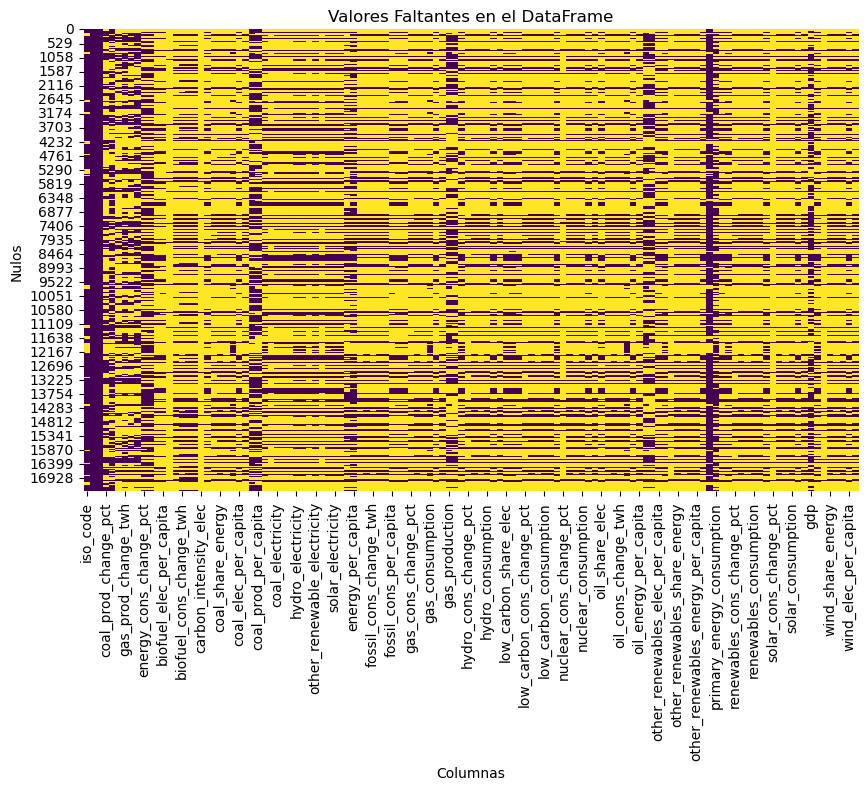

In [34]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

Como se observa en el gráfico el set de datos posee varios valores nulos y posteriormente se realizará su tratamiento. 

In [35]:
# Se obtienen los valores unicos de la columna country 
wec['country'].unique()           

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia Pacific', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia'

Se observa que no sólo hay países en la columna country, sino también regiones. Que posteriormente se tratarán de forma separada para usarlos posteriormente en la aplicación de modelos si se requiere. 

In [36]:
# Se separan en un dataset las regiones y datos del mundo
regiones = wec[wec['country'].isin(['North America', 'Other Asia & Pacific', 'Asia Pacific', 'Australia', 'Opep', 'Central African Republic', 'North Korea', 'Central America', 'Middle America','Middle East', 'Other Northern Africa', 'Europe', 'Europe (other)', 'Other Middle East', 'Eastern Africa', 'Other Caribean', 'Middle Africa', 'Other Cis', 'South Korea', 'Western Africa', 'Other South America', 'Other Southern Africa', 'World', 'Reunion', 'United Kingdom', 'South & Central America', 'South Africa'])].copy()
print("Tabla 'regiones':")
regiones

Tabla 'regiones':


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
863,NaN,Asia Pacific,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2780.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896.864,NaN,NaN,521.398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5172.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,NaN,Asia Pacific,1966,NaN,NaN,NaN,NaN,11.373,59.298,8.987,464.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2931.515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.889,NaN,NaN,580.696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5636.846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,NaN,Asia Pacific,1967,NaN,NaN,NaN,NaN,6.027,34.999,4.733,266.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2854.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [37]:
# Se guarda el data set
regiones.to_csv('..\\datasets\\regiones.csv', index=False)

In [38]:
# Se eliminan las regiones del data set wec
valores_a_eliminar = ['North America', 'Other Asia & Pacific', 'Asia Pacific', 'Australia', 'Opep', 'Central African Republic', 'North Korea', 'Central America', 'Middle America', 'Other Northern Africa', 'Europe', 'Europe (other)', 'Other Middle East', 'Eastern Africa', 'Other Caribean', 'Middle Africa', 'Middle East', 'Other Cis', 'South Korea', 'Western Africa', 'Other South America', 'Other Southern Africa', 'World', 'Reunion', 'United Kingdom', 'South & Central America', 'South Africa']
wec1 = wec[~wec['country'].isin(valores_a_eliminar)].copy()

In [39]:
# Se observan cuántos valores faltantes tiene cada columna (ordenados de mayor a menor)
missing_values1 = wec1.isnull().sum().sort_values(ascending = False) 
missing_values1

biofuel_cons_change_pct                    15221
carbon_intensity_elec                      15040
solar_cons_change_pct                      14488
nuclear_cons_change_pct                    14378
wind_cons_change_pct                       14278
other_renewables_cons_change_pct           13573
hydro_cons_change_pct                      12321
gas_cons_change_pct                        12254
coal_cons_change_pct                       12223
renewables_cons_change_pct                 12157
low_carbon_cons_change_pct                 12150
oil_cons_change_pct                        11784
fossil_cons_change_pct                     11784
fossil_cons_change_twh                     11784
oil_cons_change_twh                        11784
renewables_cons_change_twh                 11778
solar_cons_change_twh                      11778
hydro_cons_change_twh                      11778
low_carbon_cons_change_twh                 11778
coal_cons_change_twh                       11778
wind_cons_change_twh

In [40]:
# Se realiza el tratamiento de los valores nulos al data set que contiene sólo los paises
nulls=wec1.isna().sum()
for i in nulls.index:
        if nulls[i]>0:wec1[i].ffill(inplace=True)
wec1[i].bfill(inplace=True)
wec1.isna().sum()

iso_code                                     0
country                                      0
year                                         0
coal_prod_change_pct                        50
coal_prod_change_twh                         1
gas_prod_change_pct                        167
gas_prod_change_twh                        121
oil_prod_change_pct                        132
oil_prod_change_twh                        121
energy_cons_change_pct                      81
energy_cons_change_twh                      81
biofuel_share_elec                         100
biofuel_elec_per_capita                    100
biofuel_cons_change_pct                    229
biofuel_share_energy                       185
biofuel_cons_change_twh                    186
biofuel_consumption                        185
biofuel_cons_per_capita                    185
carbon_intensity_elec                      963
coal_share_elec                            100
coal_cons_change_pct                       186
coal_share_en

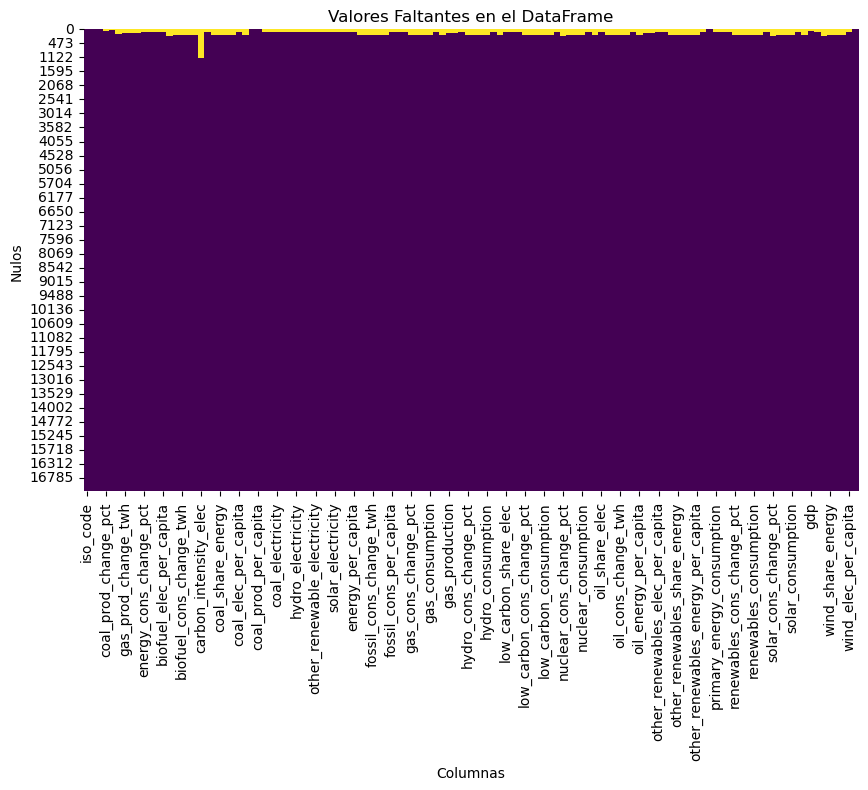

In [41]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec1.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

## Se seleccionan paises de sudamerica: Para realizar su correspondiente análisis

In [42]:
# Creamos un nuevo dataframe solo con países de sudamerica
suram = wec[(wec['iso_code'] == "ARG") | (wec['iso_code'] == "ECU") | (wec['iso_code'] == "GUY") | (wec['iso_code'] == "PER") | (wec['iso_code'] == "GUF") |(wec['iso_code'] == "URY") | (wec['iso_code'] == "PRY") | (wec['iso_code'] == "BOL")  | (wec['iso_code'] == "SUR")  | (wec['iso_code'] == "TTO") | (wec['iso_code'] == "BRA")| (wec['iso_code'] == "CHL") | (wec['iso_code'] == "COL") | (wec['iso_code'] == "VEN")]

In [43]:
# Se verifica la cantidad de filas
suram.shape

(1302, 122)

In [44]:
# Se verifican los datos numericos:
suram.select_dtypes(include=np.number)

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
680,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4756635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.311303e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,1901,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4929644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.404338e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,1902,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [45]:
# Se observan cuántos valores faltantes tiene cada columna del data set suram: (ordenados de mayor a menor)
missing_values_suram = suram.isnull().sum().sort_values(ascending=False)
missing_values_suram

carbon_intensity_elec                      1302
biofuel_cons_change_pct                    1250
nuclear_cons_change_pct                    1222
solar_cons_change_pct                      1212
wind_cons_change_pct                       1187
biofuel_electricity                        1015
other_renewable_exc_biofuel_electricity    1015
biofuel_share_elec                         1015
biofuel_elec_per_capita                    1015
other_renewables_cons_change_pct           1010
coal_electricity                            985
coal_elec_per_capita                        985
fossil_cons_per_capita                      985
fossil_share_elec                           985
gas_share_elec                              985
fossil_electricity                          985
coal_share_elec                             985
gas_electricity                             985
oil_electricity                             985
oil_share_elec                              985
oil_elec_per_capita                     

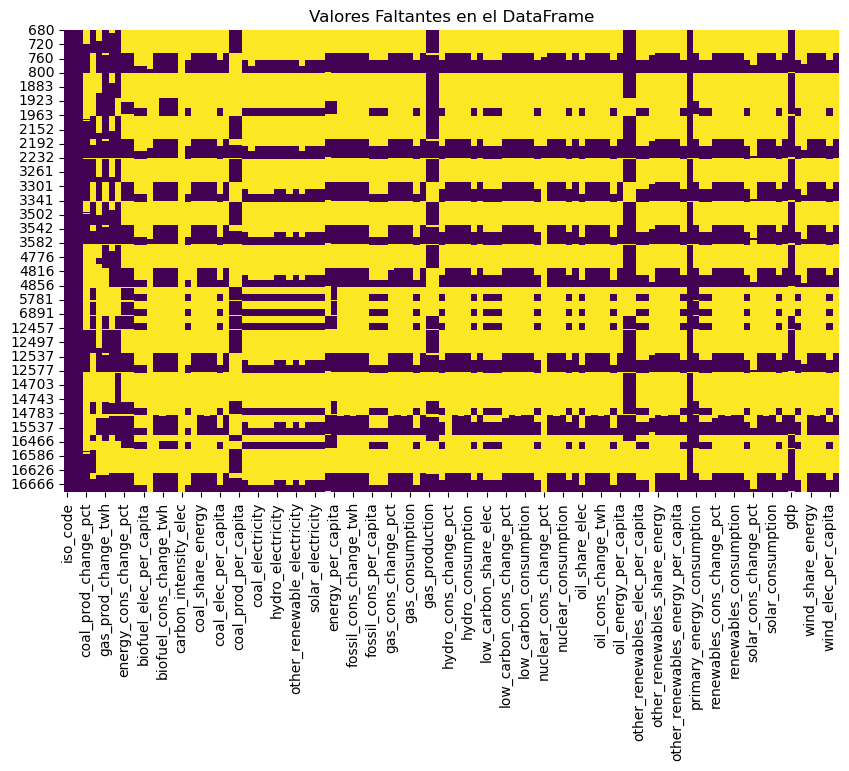

In [46]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(suram.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [47]:
graf = suram.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


In [48]:
# Se imputan los valores nulos
nulls=suram.isna().sum()
for i in nulls.index:
        if nulls[i]>0:suram[i].ffill(inplace=True)
suram[i].bfill(inplace=True)
suram.isna().sum()

iso_code                                      0
country                                       0
year                                          0
coal_prod_change_pct                         40
coal_prod_change_twh                          1
gas_prod_change_pct                          30
gas_prod_change_twh                           1
oil_prod_change_pct                           9
oil_prod_change_twh                           1
energy_cons_change_pct                       66
energy_cons_change_twh                       66
biofuel_share_elec                          100
biofuel_elec_per_capita                     100
biofuel_cons_change_pct                     111
biofuel_share_energy                         65
biofuel_cons_change_twh                      66
biofuel_consumption                          65
biofuel_cons_per_capita                      65
carbon_intensity_elec                      1302
coal_share_elec                              85
coal_cons_change_pct                    

In [54]:
prom_pais = suram.groupby('country').mean()
# Mostrar los resultados
print(prom_pais)

                       year  coal_prod_change_pct  coal_prod_change_twh  gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
country                                                                                                                                  
Argentina            1960.0             14.430568              0.419392             6.419659             3.682883            11.765170   
Bolivia              1960.0              0.000000              0.858000            32.732802             1.244207            11.329521   
Brazil               1960.0              5.543099              0.364421             7.709124             2.076463            11.715777   
Chile                1960.0              2.178917              0.455545            43.804355            -1.056992            14.877736   
Colombia             1960.0              4.665587              5.029992             3.814306             1.161802            13.350405   
Ecuador              1959.5       

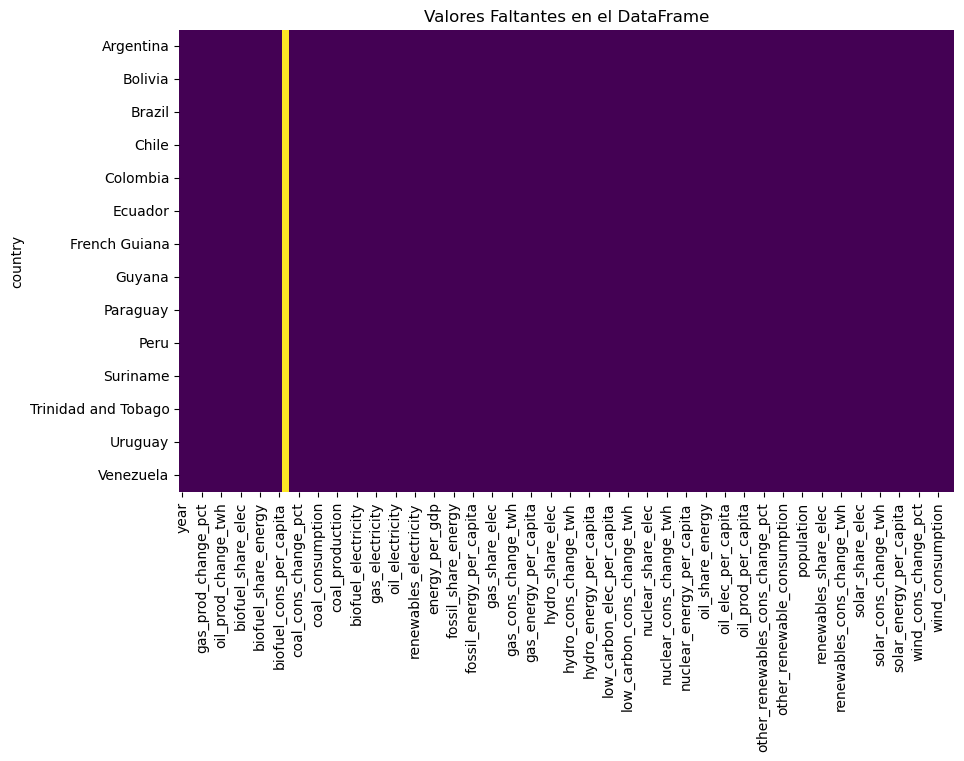

In [55]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(prom_pais.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [ ]:
# Se guarda el data set
prom_pais.to_csv('..\\datasets\\prom.csv', index=False)

In [ ]:
# Se importa el dataset
suram1= pd.read_csv(r'..\\datasets\\suram1.csv')  

In [ ]:
coordenadas=suram1['country'].unique()
coordenadas

In [ ]:
pip install geopy

In [ ]:
# se crean las coordenadas geográficas de los paises
from geopy.geocoders import Nominatim
# Crear una instancia del geocodificador
geolocalizador = Nominatim(user_agent="geo_app")

# Función para obtener las coordenadas
def obtener_coordenadas(pais):
    try:
        location = geolocalizador.geocode(pais)
        if location:
            return (location.latitude, location.longitude)
        else:
            return None
    except Exception as e:
            print(f"No se pudieron obtener las coordenadas para {pais}. Error: {str(e)}")
            return None

# Aplicar la función a la columna 'country' y crear la nueva columna 'Coordenadas'
suram1['Coordenadas'] = suram1['country'].apply(obtener_coordenadas)

# Mostrar el DataFrame con las coordenadas
print(suram1)

In [ ]:
!pip install folium
import folium
from geopy.geocoders import Nominatim

# Crear una instancia del geocodificador
geolocalizador = Nominatim(user_agent="geo_app")

# Función para obtener las coordenadas
def obtener_coordenadas(pais):
    try:
        location = geolocalizador.geocode(pais)
        if location:
            return (location.latitude, location.longitude)
        else:
            return None
    except Exception as e:
        print(f"No se pudieron obtener las coordenadas para {pais}. Error: {str(e)}")
        return None

# Aplicar la función a la columna 'country' y crear la nueva columna 'Coordenadas'
suram1['Coordenadas'] = suram1['country'].apply(obtener_coordenadas)

# Eliminar filas con coordenadas nulas
suram1= suram.dropna(subset=['Coordenadas'])

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[suram1['Coordenadas'].apply(lambda x: x[0]).mean(), suram1['Coordenadas'].apply(lambda x: x[1]).mean()], zoom_start=4)

# Agregar marcadores para cada país con sus coordenadas
for index, row in suram1.iterrows():
    folium.Marker(location=row['Coordenadas'], popup=row['country']).add_to(mapa)

# Mostrar el mapa interactivo
mapa

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y="energy_per_capita", data=graf, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

## Selección de paises:

In [ ]:
# filtro de paises
paises = ['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India', "Argentina", "Brazil", "Chile", "Bolivia"]
#filter columns
seleccion =wec.loc[wec['country'].isin(paises)]

In [ ]:
seleccion.shape

In [ ]:
# visualización de valores 
plt.figure(figsize=(10, 6))
sns.heatmap(seleccion.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [ ]:
graf2 = seleccion.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y="energy_per_capita", data=graf2, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [ ]:
# Se realiza el tratamiento de los valores nulos al data set que contiene sólo los paises
nulls=seleccion.isna().sum()
for i in nulls.index:
        if nulls[i]>0:seleccion[i].ffill(inplace=True)
seleccion[i].bfill(inplace=True)
seleccion.isna().sum()

## Columns and their description para el glosario

column 	description
iso_code 	ISO 3166-1 alpha-3 three-letter country codes
country 	Geographic location
year 	Year of observation
coal_prod_change_pct 	Annual percentage change in coal production
coal_prod_change_twh 	Annual change in coal production, measured in terawatt-hours
gas_prod_change_pct 	Annual percentage change in gas production
gas_prod_change_twh 	Annual change in gas production, measured in terawatt-hours
oil_prod_change_pct 	Annual percentage change in oil production
oil_prod_change_twh 	Annual change in oil production, measured in terawatt-hours
energy_cons_change_pct 	Annual percentage change in primary energy consumption
energy_cons_change_twh 	Annual change in primary energy consumption, measured in terawatt-hours
biofuel_share_elec 	Share of electricity consumption that comes from biofuels
biofuel_cons_change_pct 	Annual percentage change in biofuel consumption
biofuel_share_energy 	Share of primary energy consumption that comes from biofuels
biofuel_cons_change_twh 	Annual change in biofuel consumption, measured in terawatt-hours
biofuel_consumption 	Primary energy consumption from biofuels, measured in terawatt-hours
biofuel_elec_per_capita 	Per capita electricity consumption from biofuels, measured in kilowatt-hours
biofuel_cons_per_capita 	Per capita primary energy consumption from biofuels, measured in kilowatt-hours
carbon_intensity_elec 	Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_share_elec 	Share of electricity consumption that comes from coal
coal_cons_change_pct 	Annual percentage change in coal consumption
coal_share_energy 	Share of primary energy consumption that comes from coal
coal_cons_change_twh 	Annual change in coal consumption, measured in terawatt-hours
coal_consumption 	Primary energy consumption from coal, measured in terawatt-hours
coal_elec_per_capita 	Per capita electricity consumption from coal, measured in kilowatt-hours
coal_cons_per_capita 	Per capita primary energy consumption from coal, measured in kilowatt-hours
coal_production 	Coal production, measured in terawatt-hours
coal_prod_per_capita 	Per capita coal production, measured in kilowatt-hours
electricity_generation 	Electricity generation, measured in terawatt-hours
biofuel_electricity 	Electricity generation from biofuels, measured in terawatt-hours
coal_electricity 	Electricity generation from coal, measured in terawatt-hours
fossil_electricity 	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity 	Electricity generation from gas, measured in terawatt-hours
hydro_electricity 	Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity 	Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity 	Electricity generation from oil, measured in terawatt-hours
other_renewable_electricity 	Electricity generation from other renewable sources, measured in terawatt-hours
other_renewable_exc_biofuel_electricity 	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours
renewables_electricity 	Electricity generation from renewables, measured in terawatt-hours
solar_electricity 	Electricity generation from solar, measured in terawatt-hours
wind_electricity 	Electricity generation from wind, measured in terawatt-hours
energy_per_gdp 	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.
energy_per_capita 	Primary energy consumption per capita, measured in kilowatt-hours per year
fossil_cons_change_pct 	Annual percentage change in fossil fuel consumption
fossil_share_energy 	Share of primary energy consumption that comes from fossil fuels
fossil_cons_change_twh 	Annual change in fossil fuel consumption, measured in terawatt-hours
fossil_fuel_consumption 	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_energy_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_cons_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_share_elec 	Share of electricity consumption that comes from fossil fuels (coal, oil and gas combined)
gas_share_elec 	Share of electricity consumption that comes from gas
gas_cons_change_pct 	Annual percentage change in gas consumption
gas_share_energy 	Share of primary energy consumption that comes from gas
gas_cons_change_twh 	Annual change in gas consumption, measured in terawatt-hours
gas_consumption 	Primary energy consumption from gas, measured in terawatt-hours
gas_elec_per_capita 	Per capita electricity consumption from gas, measured in kilowatt-hours
gas_energy_per_capita 	Per capita primary energy consumption from gas, measured in kilowatt-hours
gas_production 	Gas production, measured in terawatt-hours
gas_prod_per_capita 	Per capita gas production, measured in kilowatt-hours
hydro_share_elec 	Share of electricity consumption that comes from hydropower
hydro_cons_change_pct 	Annual percentage change in hydropower consumption
hydro_share_energy 	Share of primary energy consumption that comes from hydropower
hydro_cons_change_twh 	Annual change in hydropower consumption, measured in terawatt-hours
hydro_consumption 	Primary energy consumption from hydropower, measured in terawatt-hours
hydro_elec_per_capita 	Per capita electricity consumption from hydropower, measured in kilowatt-hours
hydro_energy_per_capita 	Per capita primary energy consumption from hydropower, measured in kilowatt-hours
low_carbon_share_elec 	Share of electricity consumption that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear
low_carbon_electricity 	Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power
low_carbon_elec_per_capita 	Per capita electricity consumption from low-carbon sources, measured in kilowatt-hours
low_carbon_cons_change_pct 	Annual percentage change in low-carbon energy consumption
low_carbon_share_energy 	Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear
low_carbon_cons_change_twh 	Annual change in low-carbon energy consumption, measured in terawatt-hours
low_carbon_consumption 	Primary energy consumption from low-carbon sources, measured in terawatt-hours
low_carbon_energy_per_capita 	Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours
nuclear_share_elec 	Share of electricity consumption that comes from nuclear power
nuclear_cons_change_pct 	Annual percentage change in nuclear consumption
nuclear_share_energy 	Share of primary energy consumption that comes from nuclear power
nuclear_cons_change_twh 	Annual change in nuclear consumption, measured in terawatt-hours
nuclear_consumption 	Primary energy consumption from nuclear power, measured in terawatt-hours
nuclear_elec_per_capita 	Per capita electricity consumption from nuclear power, measured in kilowatt-hours
nuclear_energy_per_capita 	Per capita primary energy consumption from nuclear, measured in kilowatt-hours
oil_share_elec 	Share of electricity consumption that comes from oil
oil_cons_change_pct 	Annual percentage change in oil consumption
oil_share_energy 	Share of primary energy consumption that comes from oil
oil_cons_change_twh 	Annual change in oil consumption, measured in terawatt-hours
oil_consumption 	Primary energy consumption from oil, measured in terawatt-hours
oil_elec_per_capita 	Primary energy consumption from oil, measured in terawatt-hours
oil_energy_per_capita 	Per capita primary energy consumption from oil, measured in kilowatt-hours
oil_production 	Oil production, measured in terawatt-hours
oil_prod_per_capita 	Per capita oil production, measured in kilowatt-hours
other_renewables_elec_per_capita 	Per capita electricity consumption from other renewables, measured in kilowatt-hours
other_renewables_share_elec 	Share of electricity consumption that comes from other renewables
other_renewables_cons_change_pct 	Annual percentage change in energy consumption from other renewables
other_renewables_share_energy 	Share of primary energy consumption that comes from other renewables
other_renewables_cons_change_twh 	Annual change in other renewable consumption, measured in terawatt-hours
other_renewable_consumption 	Primary energy consumption from other renewables, measured in terawatt-hours
other_renewables_energy_per_capita 	Per capita primary energy consumption from other renewables, measured in kilowatt-hours
per_capita_electricity 	Electricity consumption per capita, measured in kilowatt-hours
population 	Total population
primary_energy_consumption 	Primary energy consumption, measured in terawatt-hours
renewables_elec_per_capita 	Per capita primary energy consumption from renewables, measured in kilowatt-hours
renewables_share_elec 	Share of electricity consumption that comes from renewables
renewables_cons_change_pct 	Annual percentage change in renewable energy consumption
renewables_share_energy 	Share of primary energy consumption that comes from renewables
renewables_cons_change_twh 	Annual change in renewable energy consumption, measured in terawatt-hours
renewables_consumption 	Primary energy consumption from renewables, measured in terawatt-hours
renewables_energy_per_capita 	Per capita electricity consumption from renewables, measured in kilowatt-hours
solar_share_elec 	Share of electricity consumption that comes from solar
solar_cons_change_pct 	Annual percentage change in solar consumption
solar_share_energy 	Share of primary energy consumption that comes from solar
solar_cons_change_twh 	Annual change in solar consumption, measured in terawatt-hours
solar_consumption 	Primary energy consumption from solar, measured in terawatt-hours
solar_elec_per_capita 	Per capita electricity consumption from solar, measured in kilowatt-hours
solar_energy_per_capita 	Per capita primary energy consumption from solar, measured in kilowatt-hours
gdp 	Total real gross domestic product, inflation-adjusted
wind_share_elec 	Share of electricity consumption that comes from wind
wind_cons_change_pct 	Annual percentage change in wind consumption
wind_share_energy 	Share of primary energy consumption that comes from wind
wind_cons_change_twh 	Annual change in wind consumption, measured in terawatt-hours
wind_consumption 	Primary energy consumption from wind, measured in terawatt-hours
wind_elec_per_capita 	Per capita electricity consumption from wind, measured in kilowatt-hours
wind_energy_per_capita 	Per capita primary energy consumption from wind, measured in kilowatt-hours